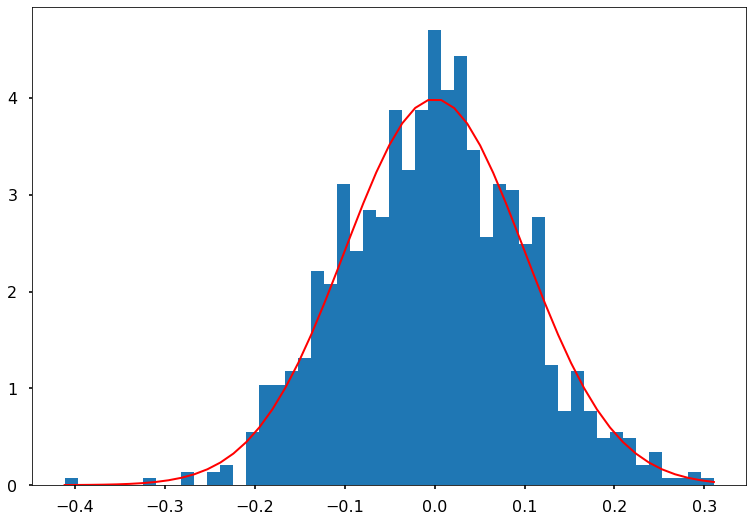

In [35]:
# Plot normal (Gaussian) distribution with numpy.random.normal
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 50, density=True)    # bins=50 is the number of equal-width bins in the range
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * 
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
               linewidth=2, color='r')
plt.show()

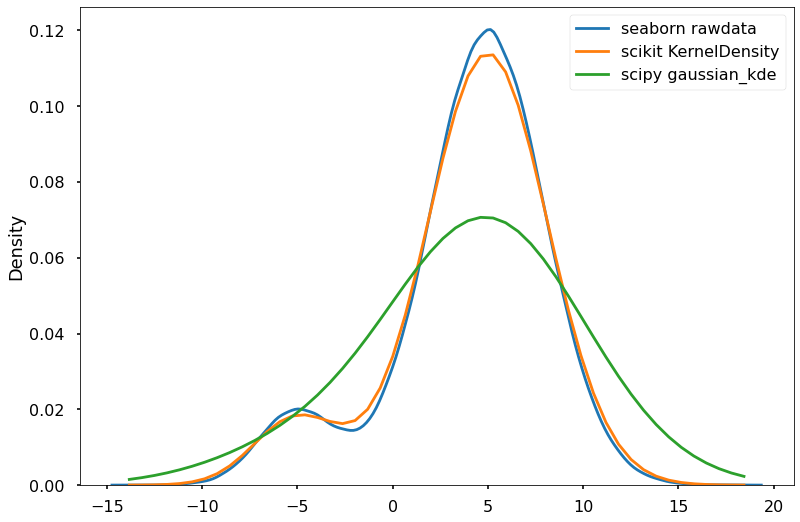

In [36]:
# Kernel Density Estimation using scipy's gaussian_kde and sklearn's KernelDensity 
# https://stackoverflow.com/questions/68396403/kernel-density-estimation-using-scipys-gaussian-kde-and-sklearns-kerneldensity

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
import seaborn as sns                           # Seaborn is a library for making statistical graphics in Python
from sklearn.neighbors import KernelDensity

n = 500000
dist_frac = 0.1
x1 = np.random.normal(-5,2,int(n*dist_frac))      # 1st distribution with mu=-5, sigma=2
x2 = np.random.normal(5,3,int(n*(1-dist_frac)))   # 2nd distribution with mu= 5, sigma=3
x = np.concatenate((x1,x2))                       # concatinate x1 and x2 in one array, where x1 : x2 relation is 1:9
np.random.shuffle(x)                              # shuffling the content of x array to change the input values sequence
eval_points = np.linspace(np.min(x), np.max(x))   # returns evenly spaced numbers over a specified interval

kde_sk = KernelDensity(bandwidth=1.0, kernel='gaussian')    # Kernel Density Estimation with the default bandwidth=1.0
kde_sk.fit(x.reshape([-1,1]))                               # Fits the Kernel Density model on the data
y_sk = np.exp(kde_sk.score_samples(eval_points.reshape(-1,1)))  # Calculates exponential of all elements in the input array

kde_sp = gaussian_kde(x, bw_method=1.0)   # estimates the probability density function (PDF) of a random variable in a non-parametric way
y_sp = kde_sp.pdf(eval_points)       # evaluates the estimated pdf on a provided set of points

sns.kdeplot(x)
plt.plot(eval_points, y_sk)
plt.plot(eval_points, y_sp)
plt.legend(['seaborn rawdata','scikit KernelDensity','scipy gaussian_kde'])

In [37]:
# Home work 1.1: Check the Central limit Theorem by 
# building two-modal distribution (like above) generating many points, 
# taking samples (e.g. 100 values) and computing mean value,
# plotting distribution with mean values from many samples

In [38]:
# Generate some random two-dimensional data

from scipy import stats
def measure(n):
    "Measurement model, return two coupled measurements."
    m1 = np.random.normal(size=n)
    m2 = np.random.normal(scale=0.5, size=n)
    return m1+m2, m1-m2

In [39]:
m1, m2 = measure(2000)
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()

In [40]:
# Perform a kernel density estimate on the data

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

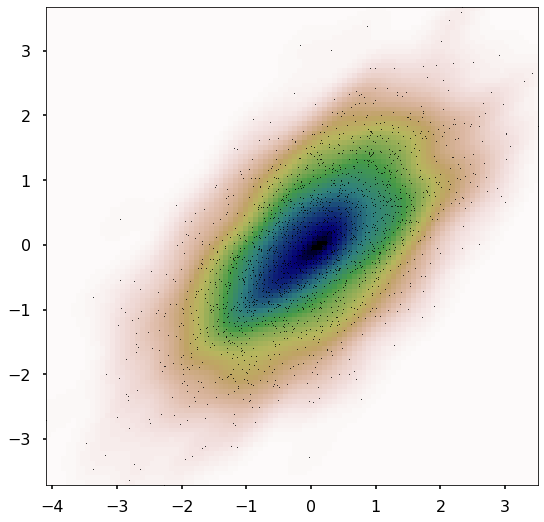

In [41]:
# Plot the two-dimentional distribution

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax])
ax.plot(m1, m2, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

In [42]:
# Least Squares Regression in Python
# https://pythonnumericalmethods.berkeley.edu/notebooks/chapter16.04-Least-Squares-Regression-in-Python.html

import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

In [43]:
# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

In [44]:
# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T

# turn y into a column vector
y = y[:, np.newaxis]

In [45]:
# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alpha)

[[1.56403068]
 [0.97349523]]


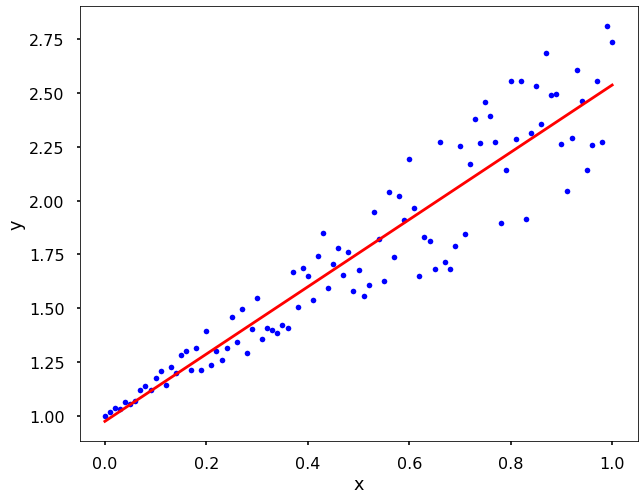

In [46]:
# plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [47]:
# Use the pseudoinverse

pinv = np.linalg.pinv(A)
alpha = pinv.dot(y)
print(alpha)

[[1.56403068]
 [0.97349523]]


In [48]:
# Use the least square methods (numpy.linalg.lstsq) to get the solution

alpha = np.linalg.lstsq(A, y, rcond=None)[0]
print(alpha)

[[1.56403068]
 [0.97349523]]


In [49]:
# Use optimize.curve_fit from scipy

# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

def func(x, a, b):
    y = a*x + b
    return y

alpha = optimize.curve_fit(func, xdata = x, ydata = y)[0]
print(alpha)

[1.5719587  0.97467293]


[[ 1.56829795e+00]
 [-1.79111911e+08]]


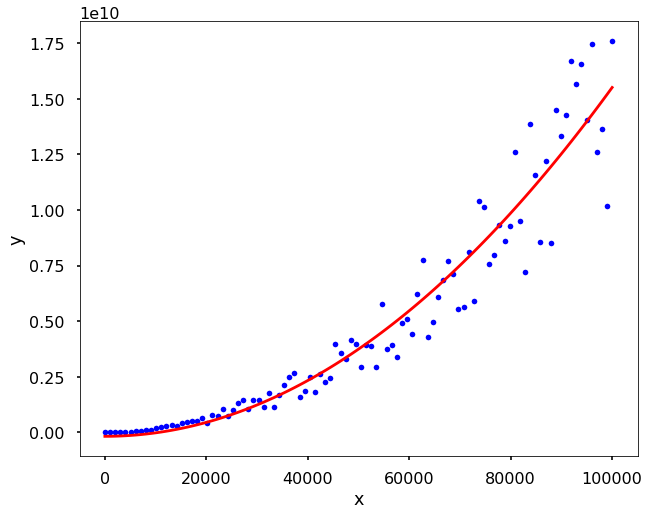

In [50]:
# Home work 1.2: Apply polynomial or nonlinear regression for data analysis by
# generating noisy points, 
# using least square regression or pseudoinverse or optimize.curve_fit methods (on your choice)
x = np.linspace(1, 100000, 100)

y = 1 + x + x * x + x * x * np.random.random(len(x))

A = np.vstack([x * x, np.ones(len(x))]).T

y = y[:, np.newaxis]

alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alpha)

plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')

plt.plot(x, alpha[0]* x * x + alpha[1], 'r')

plt.xlabel('x')
plt.ylabel('y')
plt.show()